## 데이터셋 설명
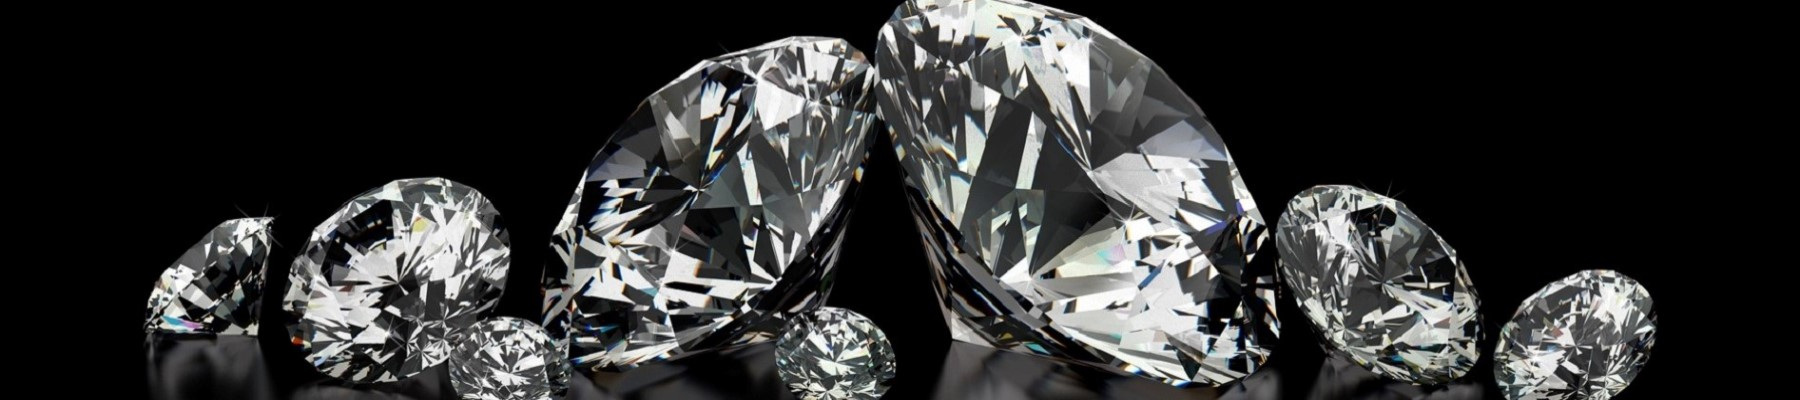

seaborn 라이브러리의 diamonds 데이터셋은 10개의 칼럼, 약 54000개의 행을 가지고 있습니다.


### 칼럼 설명
* **price**: The price of the diamond in US dollars ($326--$18,823).
<br>가격: 다이아몬드의 가격 (달러로 326--18,823).
<br>

* **carat**: The weight of the diamond (0.2--5.01).
<br>캐럿: 다이아몬드의 무게 (0.2--5.01).
<br>
* **cut**: The quality of the cut (Fair, Good, Very Good, Premium, Ideal).
<br>컷: 컷팅의 품질 (Fair, Good, Very Good, Premium, Ideal).
<br>
* **color**: Diamond color, from J (worst) to D (best).
<br>색상: 다이아몬드의 색상, J (최악)에서 D (최고)까지.
<br>
* **clarity**: A measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best)).
<br>선명도: 다이아몬드의 선명도 측정 (I1 (최악), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (최고)).
<br>
* **x**: Length in mm (0--10.74).
<br>x (길이): 밀리미터 단위의 길이 (0--10.74).
<br>
* **y**: Width in mm (0--58.9).
<br>y (너비): 밀리미터 단위의 너비 (0--58.9).
<br>
* **z**: Depth in mm (0--31.8).
<br>z (깊이): 밀리미터 단위의 깊이 (0--31.8).
<br>
* **depth**: Total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79).
<br>깊이 비율: 총 깊이 비율 = z / (x, y의 평균) = 2 * z / (x + y) (43--79).
<br>
* **table**: Width of top of diamond relative to widest point (43--95).
<br>테이블: 다이아몬드 상단의 폭이 가장 넓은 지점에 대한 상대적 폭 (43--95).
<br>


https://www.kaggle.com/datasets/shivam2503/diamonds
더 자세한 내용은 위 링크에서 확인할 수 있습니다.

## 데이터셋 다운로드

In [1]:
import seaborn as sns

diamonds = sns.load_dataset('diamonds')
diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


## 데이터 살펴보기
데이터의 **칼럼별 자료형**을 살펴보세요!

In [2]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


## 가설 수립
데이터셋을 살펴보고, 다음의 자료형에 맞는 적절한 칼럼 조합을 하나씩 말해주세요.
<br>ex) carat - cut

* 수치형 - 수치형: depth - table
* 범주형 - 수치형: cut - price
* 범주형 - 범주형: clarity - color

## 가설 검정
4번에서 찾은 조합을 가지고, 데이터셋을 살펴보고 적절한 가설을 세운 후 검정 후 평가해봅시다.

### 수치형 - 수치형
* 귀무가설: 두 변수(depth, table)간 선형 상관관계가 존재하지 않는다.
* 대립가설: 두 변수(depth, table)간 선형 상관관계가 존재한다.

#### 시각화

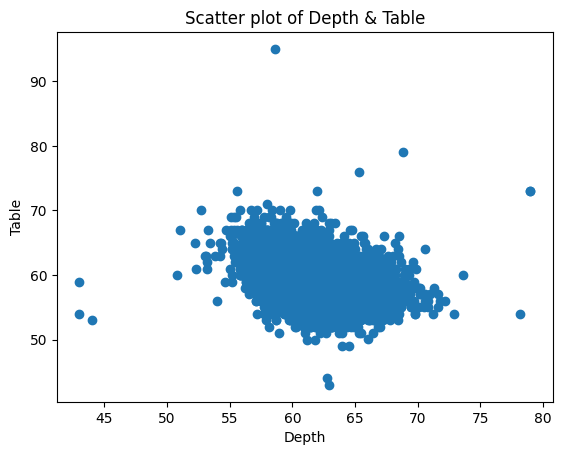

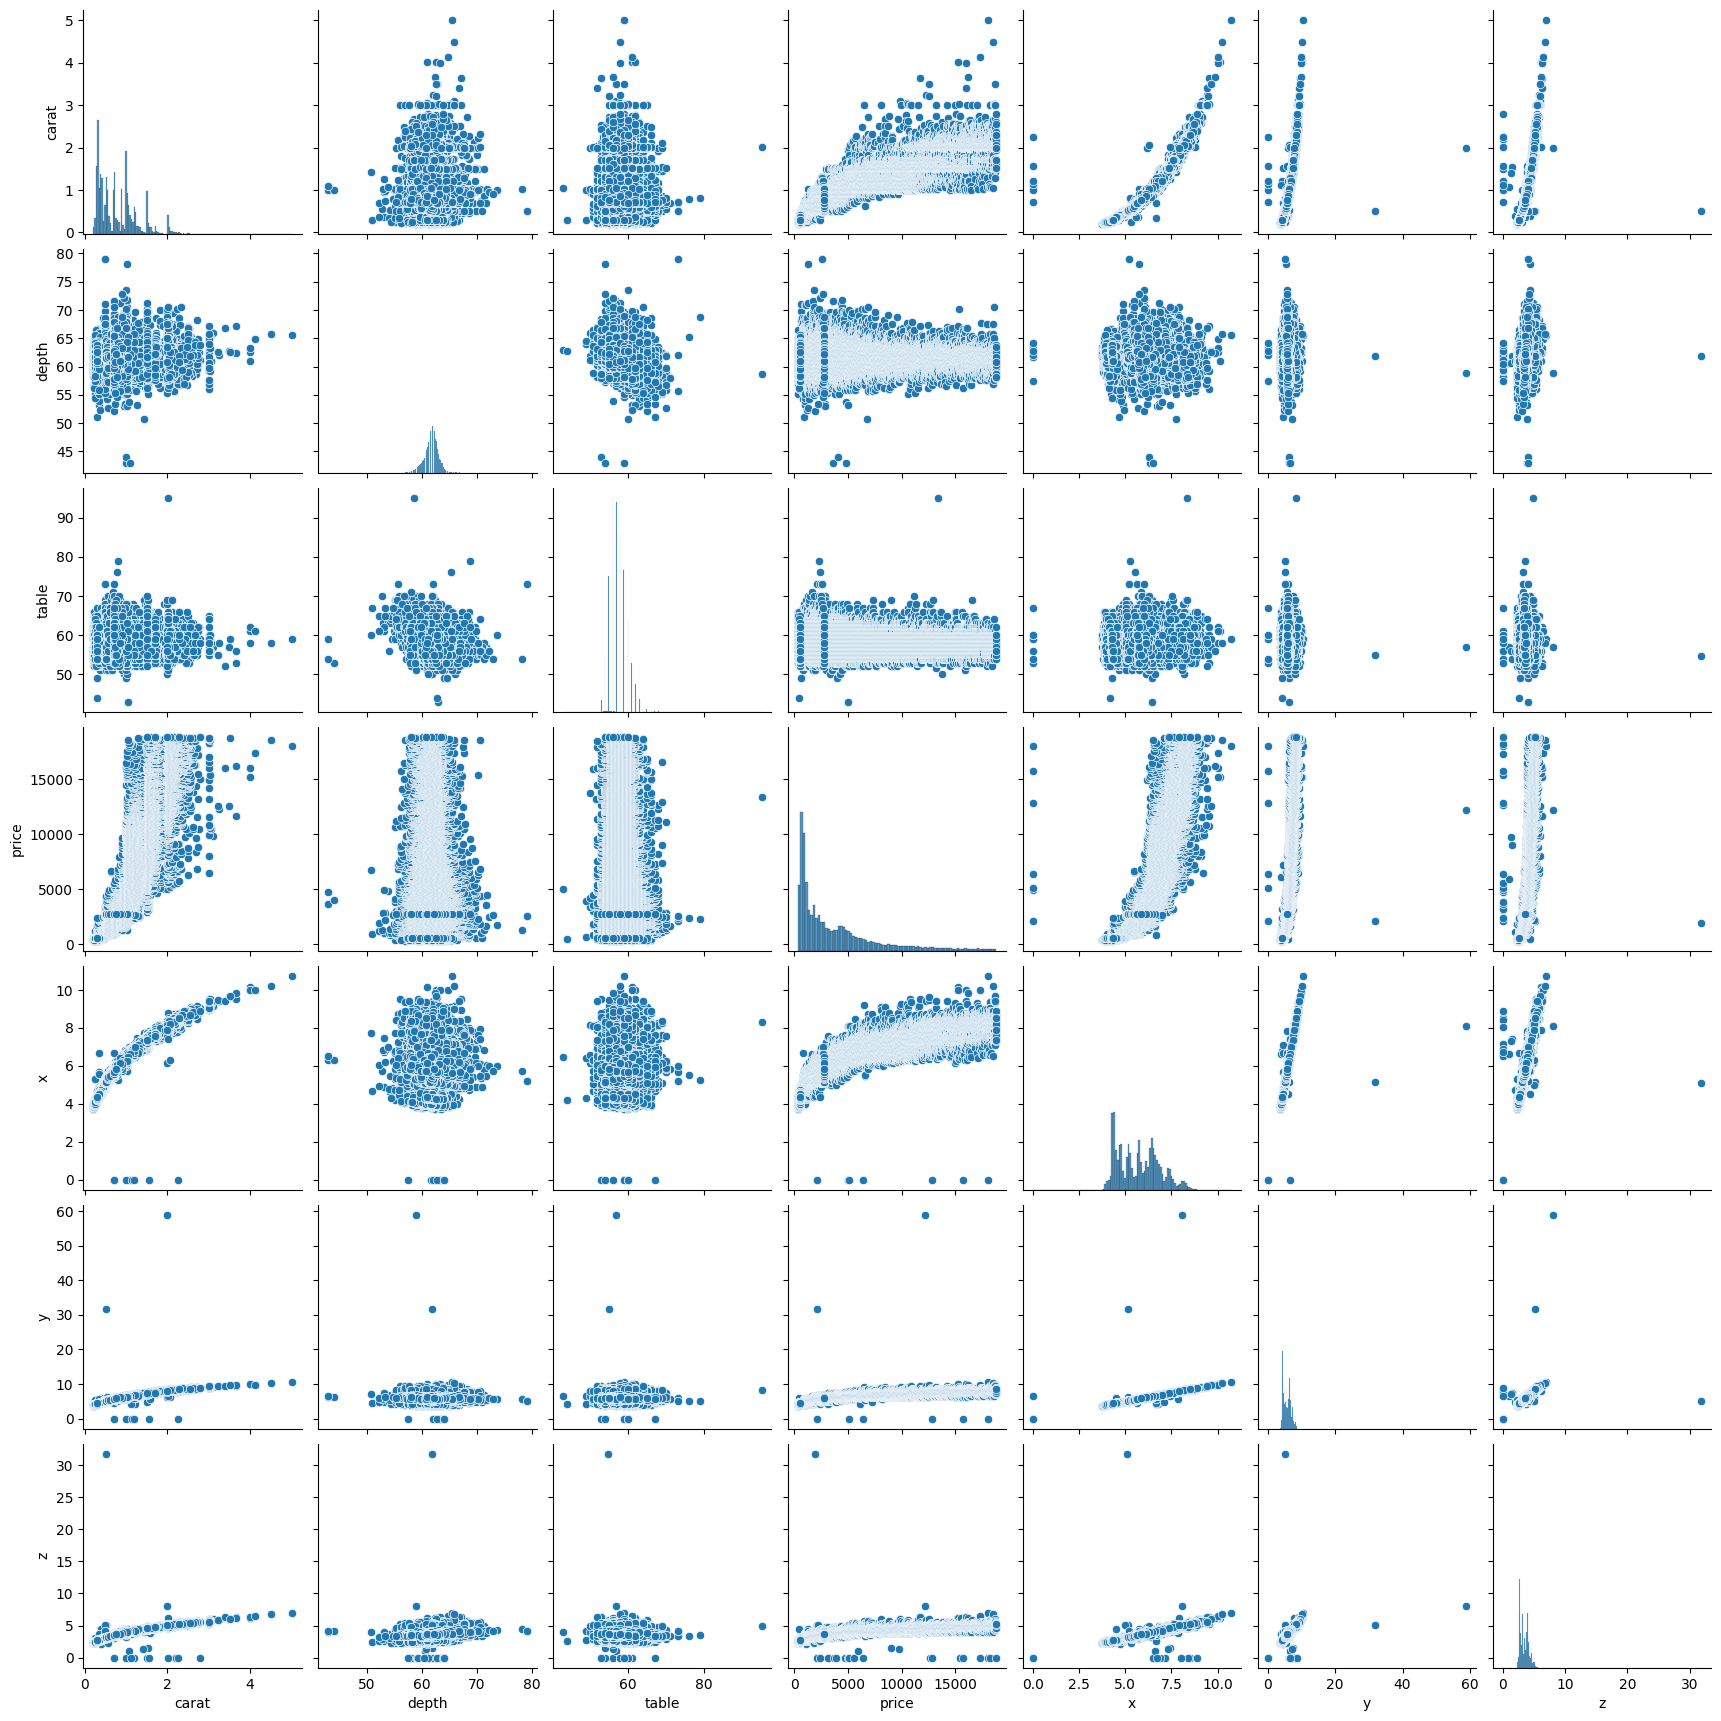

In [7]:
# 시각화 코드를 작성해주세요
import matplotlib.pyplot as plt
plt.scatter(diamonds['depth'], diamonds['table'])
plt.xlabel("Depth")
plt.ylabel("Table")
plt.title("Scatter plot of Depth & Table")
sns.pairplot(diamonds)

#### 수치화

In [9]:
# 여기에 검정을 수행하는 코드를 적어주세요.
import numpy as np
np.cov(diamonds['depth'], diamonds['table'])

array([[ 2.05240384, -0.94683994],
       [-0.94683994,  4.99294808]])

In [10]:
diamonds[['depth', 'table']].corr()

,depth,table
depth,1.000000,-0.295779
table,-0.295779,1.000000


In [12]:
import scipy.stats as spst
spst.pearsonr(diamonds['depth'], diamonds['table'])

PearsonRResult(statistic=np.float64(-0.29577852152658235), pvalue=np.float64(0.0))

<여기에 검정 결과를 해석해주세요>
- depth와 table 사이에는 약한 음의 상관관계가 존재한다.
- 즉, 다이아몬드의 깊이가 깊어질수록 테이블 값은 다소 줄어드는 경향이 있다.
- 그러나 상관계수의 절댓값이 크지 않으므로, depth만으로 table을 강하게 예측할 수는 없다.

### 범주형 - 수치형
* 귀무가설: cut 그룹 별 가격 평균에는 차이가 없다.
* 대립가설: cut 그룹 별 가격 평균에는 차이가 있다.

#### 시각화

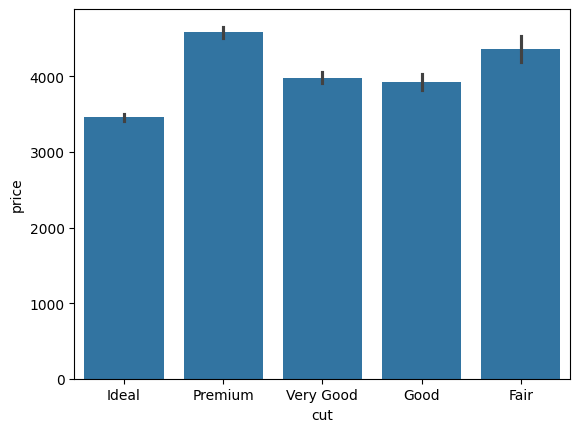

In [13]:
# 시각화 코드를 작성해주세요
sns.barplot(x = 'cut', y = 'price', data = diamonds)
plt.show()

#### 수치화

In [17]:
# 여기에 검정을 수행하는 코드를 적어주세요.
Ideal = diamonds.loc[diamonds['cut'] == 'Ideal', 'price']
Premium = diamonds.loc[diamonds['cut'] == 'Premium', 'price']
Very_Good = diamonds.loc[diamonds['cut'] == 'Very Good', 'price']
Good = diamonds.loc[diamonds['cut'] == 'Good', 'price']
Fair = diamonds.loc[diamonds['cut'] == 'Fair', 'price']

spst.f_oneway(Ideal, Premium, Very_Good, Good, Fair)

F_onewayResult(statistic=np.float64(175.68871735080606), pvalue=np.float64(8.428307307103927e-150))

In [18]:
#사후검정
from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey = pairwise_tukeyhsd(endog=diamonds['price'], groups=diamonds['cut'], alpha=0.05)
print(tukey)

     Multiple Comparison of Means - Tukey HSD, FWER=0.05      
 group1   group2   meandiff p-adj    lower      upper   reject
--------------------------------------------------------------
   Fair      Good -429.8933 0.0015  -740.4593 -119.3273   True
   Fair     Ideal -901.2158    0.0 -1180.5808 -621.8507   True
   Fair   Premium  225.4999 0.1951   -59.2763  510.2762  False
   Fair Very Good -376.9979 0.0031  -663.8719  -90.1239   True
   Good     Ideal -471.3225    0.0  -642.3685 -300.2765   True
   Good   Premium  655.3933    0.0   475.6451  835.1414   True
   Good Very Good   52.8954 0.9341  -130.1581  235.9489  False
  Ideal   Premium 1126.7157    0.0  1008.8048 1244.6267   True
  Ideal Very Good  524.2179    0.0    401.327  647.1088   True
Premium Very Good -602.4978    0.0  -737.2377 -467.7579   True
--------------------------------------------------------------


<여기에 검정 결과를 해석해주세요>
- p-value가 매우 작으므로 귀무가설은 기각된다.
- 즉, 다이아몬드의 가격은 cut 등급에 따라 유의미하게 차이가 있다.
- 사후검정 수행 결과에 따르면, 평균 가격 서열은 Premium > Ideal > Very Good ≈ Good > Fair 순서이다.
- Premium은 다른 모든 등급보다 가격이 유의미하게 높고, Fair는 Ideal·Very Good·Good보다 유의미하게 낮으며, Good과 Very Good은 차이가 거의 없다.

### 범주형 - 범주형
* 귀무가설: clarity와 color는 관련이 없다.
* 대립가설: clarity와 color는 관련이 있다.

#### 시각화

In [19]:
print(diamonds['color'].unique())

['E', 'I', 'J', 'H', 'F', 'G', 'D']
Categories (7, object): ['D', 'E', 'F', 'G', 'H', 'I', 'J']


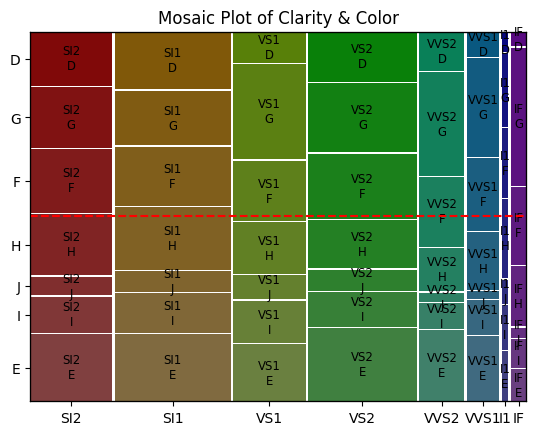

In [21]:
# 시각화 코드를 작성해주세요
from statsmodels.graphics.mosaicplot import mosaic
mosaic(diamonds, ['clarity', 'color'])
plt.axhline(y=0.5, color='red', linestyle='--')
plt.title("Mosaic Plot of Clarity & Color")
plt.show()

#### 수치화

In [24]:
# 여기에 검정을 수행하는 코드를 적어주세요.
import pandas as pd
from scipy.stats import chi2_contingency
table = pd.crosstab(diamonds['clarity'], diamonds['color'])
chi2, p, dof, expected = chi2_contingency(table)
print('카이제곱 통계량', chi2)
print('p값:', p)
print('자유도:', dof)
print('기대빈도:', expected)

카이제곱 통계량 2047.0791639481317
p값: 0.0
자유도: 42
기대빈도: [[ 224.82851316  325.11364479  316.65146459  374.72525028  275.56840934
   179.92918057   93.18353726]
 [ 459.07721542  663.84936967  646.57044865  765.1512792   562.68298109
   367.39729329  190.27141268]
 [ 636.30237301  920.12610308  896.17671487 1060.5352614   779.90478309
   509.22973674  263.72502781]
 [1026.29820171 1484.08021876 1445.45202076 1710.54749722 1257.91590656
   821.34152762  425.36462736]
 [1539.63570634 2226.39276974 2168.44338154 2566.1352614  1887.10478309
  1232.16307008  638.12502781]
 [1640.99694105 2372.9663515  2311.20189099 2735.0756396  2011.34149055
  1313.28197998  680.13570634]
 [1154.78958102 1669.88539118 1626.42098628 1924.70611791 1415.40556174
   924.17256211  478.61979978]
 [  93.0714683   134.58615128  131.08309232  155.12369299  114.07608454
    74.48464961   38.57486096]]


<여기에 검정 결과를 해석해주세요>
- 카이제곱 통계량이 매우 크고 p값이 0이므로, 두 변수는 통계적으로 유의하게 관련이 있다.
- 즉, 다이아몬드의 clarity와 color는 서로 독립이 아니다.

고생 많으셨어요:) 회귀 세션도 화이팅!